# From Interest Rate Modelling, Andersen and Piterbarg, chapter 16

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from ito_diffusions import *
from volmodels import *
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [3]:
ONE_BP = 1e-4
ONE_PCT = 1e-2
N_STRIKES = 500

## Diffusion equation

* $dX_t = \sigma_t C(X_t)dW_t,$
* $C(x) = bx+(m-b)x_0 + (1-m)L,$
* $d\sigma_t = \eta \sigma_t dB_t,$
* $d<B,W>_t = \rho dt$

## Numerical experiments

In [4]:
f = 2*ONE_PCT
shift = 0.8
mixing = 0.99
sigma_0 = 20*ONE_PCT
vov = 40*ONE_PCT
rho = -40*ONE_PCT
L = f
logmoneyness_lo = -1.5
logmoneyness_hi = 0.5

In [5]:
Model_LN = SLN_adjustable_backbone_LN(sigma_0=sigma_0,
                                      vov=vov,
                                      rho=rho,
                                      shift=shift, 
                                      mixing=mixing, 
                                      L=L,
                                      f=f,
                                      n_strikes=N_STRIKES,
                                      logmoneyness_lo=logmoneyness_lo,
                                      logmoneyness_hi=logmoneyness_hi
                                     )
Model_N = SLN_adjustable_backbone_N(sigma_0=sigma_0,
                                    vov=vov,
                                    rho=rho,
                                    shift=shift, 
                                    mixing=mixing,
                                    L=L,
                                    f=f,
                                    n_strikes=N_STRIKES,
                                    logmoneyness_lo=logmoneyness_lo,
                                    logmoneyness_hi=logmoneyness_hi
                                   )

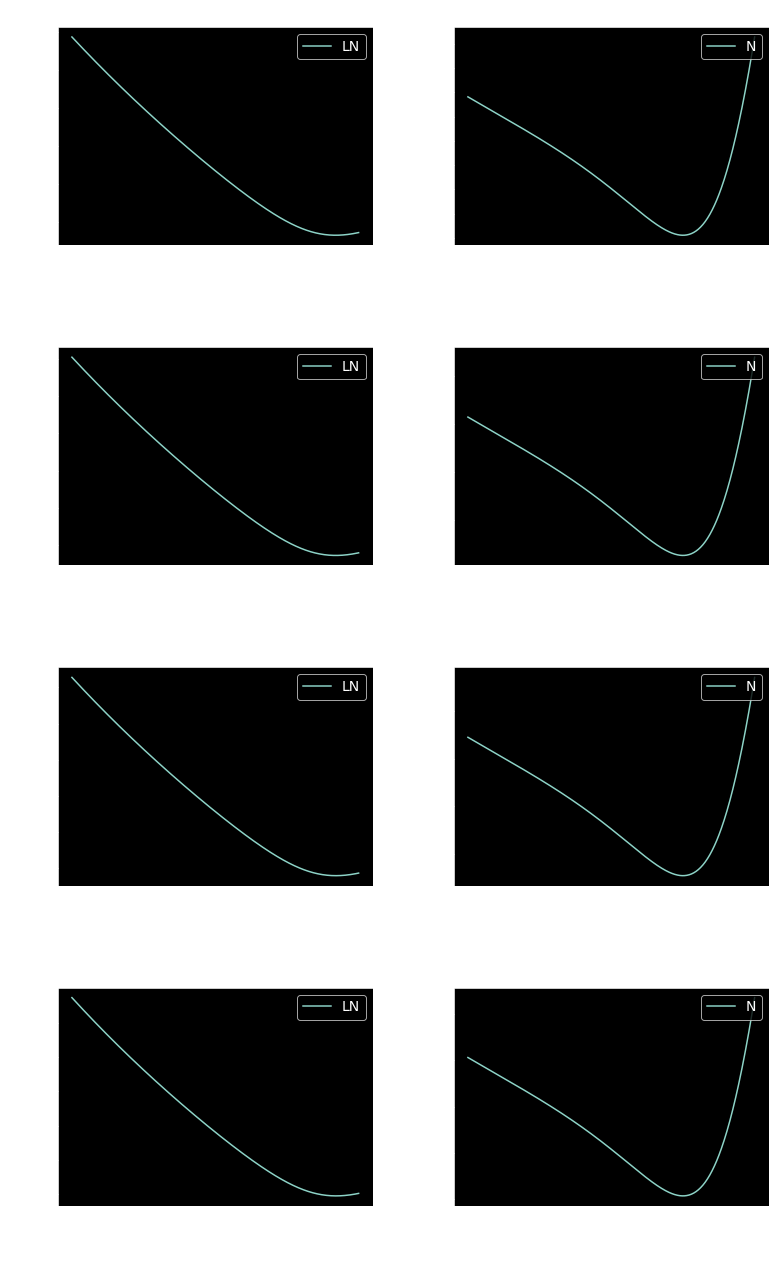

In [6]:
xlabel = 'logmoneyness\n\n'
ylabel = 'implied vol'
labels = ['LN', 'N']

T_expiries = [1.0, 5.0, 10.0, 20.0]

fig, axes = plt.subplots(nrows=4, ncols=2)

for i, ax_row in enumerate(axes):
    T_expiry = T_expiries[i]
    Model_LN.T_expiry = T_expiry
    Model_N.T_expiry = T_expiry
    x_grid = Model_LN.logmoneyness_grid

    models = [Model_LN, Model_N]
    for j, ax in enumerate(ax_row):
        model = models[j]
        label = labels[j]
        smile = list(model.smile.values())
        
        ax.plot(x_grid, smile, label=label)

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(loc='upper right')
        ax.set_title('expiry={}y'.format(T_expiry))
    
plt.tight_layout()
plt.show()

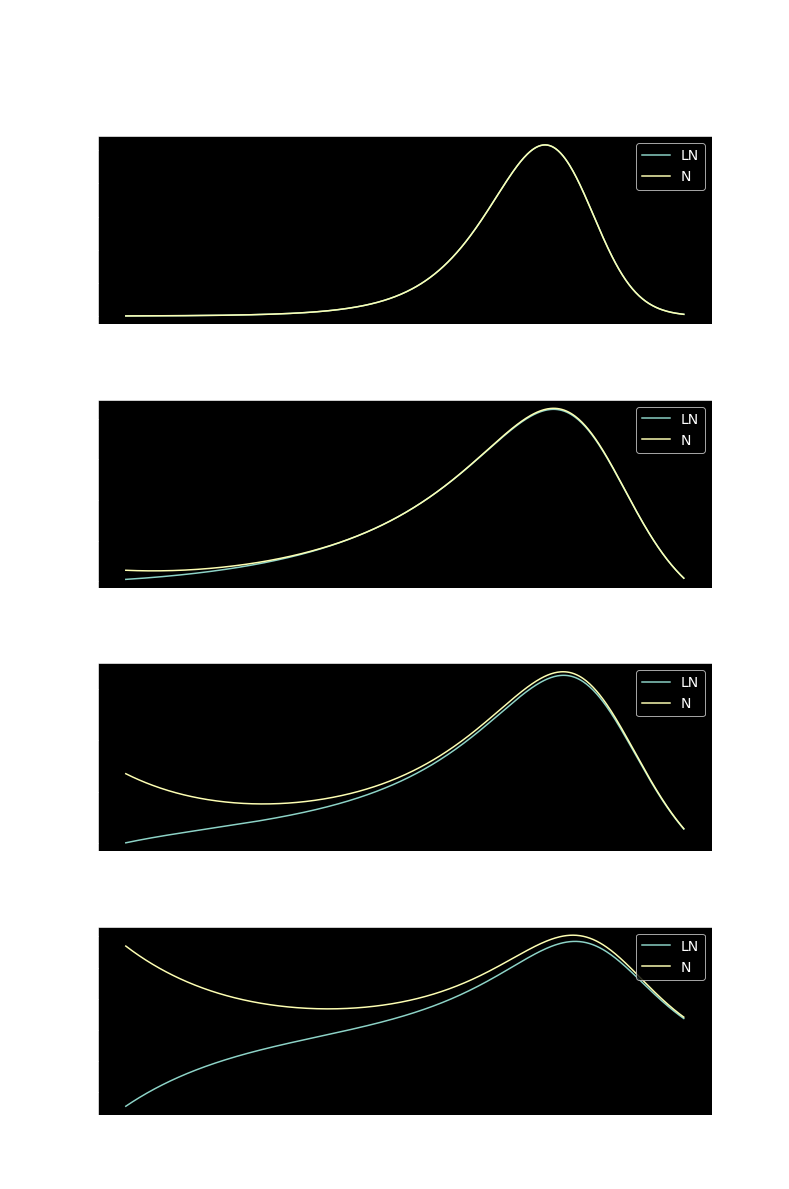

In [7]:
xlabel = 'logmoneyness\n\n'
ylabel = 'pdf'

T_expiries = [1.0, 5.0, 10.0, 20.0]

fig, axes = plt.subplots(nrows=4, ncols=1)

plt.suptitle(r'$f$={:.2%}'.format(Model_LN.f)+', ' +\
             r'$\sigma_0$={:.0%}'.format(Model_LN.sigma_0)+', ' +\
             r'$vov$={:.0%}'.format(Model_LN.vov)+', ' +\
             r'$\rho$={:.0%}'.format(Model_LN.rho)+', ' +\
             r'shift={:.0%}'.format(Model_LN.shift)+', ' +\
             r'$mixing$={:.0%}'.format(Model_LN.mixing)+', '+\
             r'$L$={:}'.format(Model_LN.L)+', '+\
             r'ATM(LN)={:.2%}'.format(Model_LN.ATM))


for i, ax in enumerate(axes):
    T_expiry = T_expiries[i]
    Model_LN.T_expiry = T_expiry
    Model_N.T_expiry = T_expiry
    
    x_grid = Model_LN.logmoneyness_grid
    
    pdf_LN = list(Model_LN.pdf_curve.values())
    pdf_N = list(Model_N.pdf_curve.values())

    ax.plot(x_grid, pdf_LN, label='LN')
    ax.plot(x_grid, pdf_N, label='N')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    ax.set_title(r'expiry={}y'.format(T_expiry))

plt.subplots_adjust(hspace=0.4)
plt.show()

## Backbone i.e ATM vol move implied by forward move

The smile dynamics is controlled by the mixing parameter. As usual, the shift parameter and $\rho$ control the ATM skew, the volatility of volatility controls the convexity and $\sigma_0$ controls the general level of implied vol. The mixing has no effect on the static shape of the smmile.

In lognormal space :

$$
ATM Backbone \simeq \frac{\sigma_0}{X_0}(mixing-1),
$$

* $mixing=1$ : flat Black backbone
* $mixing=0$ : Gaussian backbone, the ATM is higher for lower forward.

In normal space :

$$
ATM Backbone \simeq \sigma_0 mixing,
$$

* $mixing=1$ : increasing Black backbone, the ATM is lower for lower forward 
* $mixing=0$ : flat Gaussian backbone.


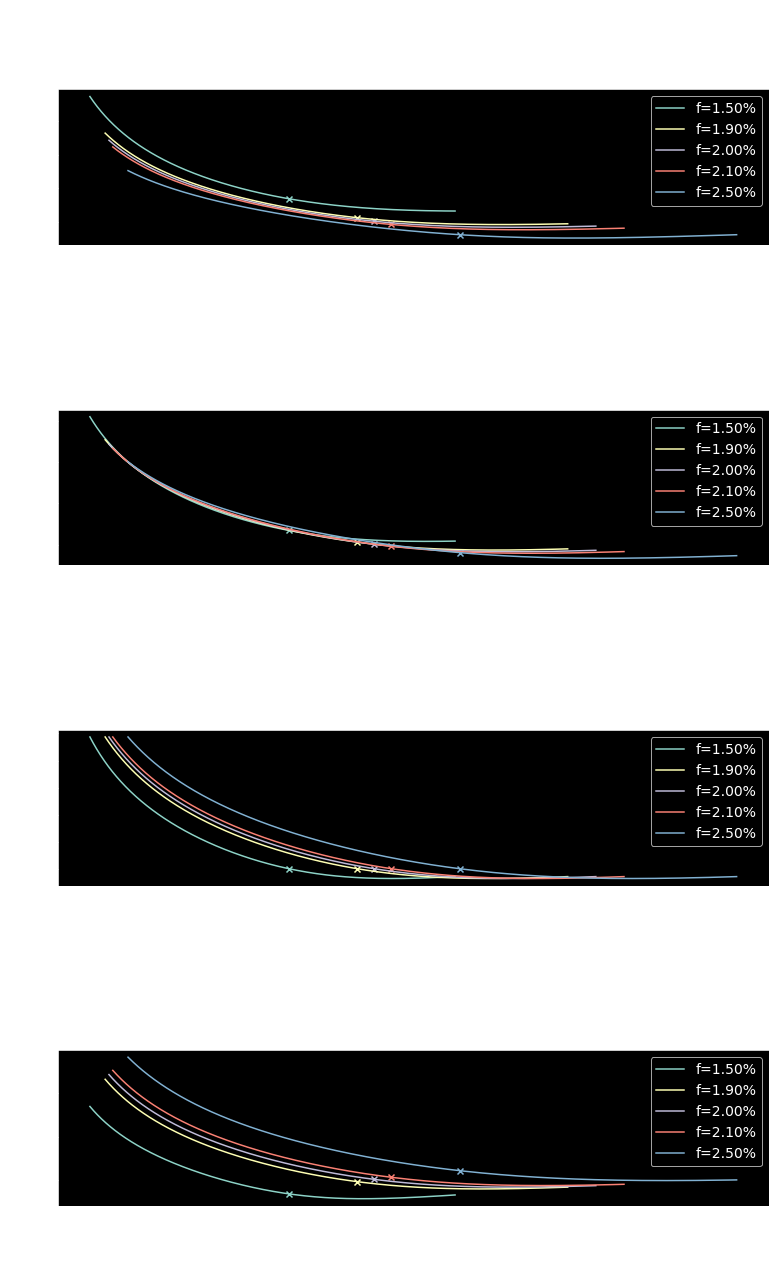

In [8]:
xlabel = 'strike\n\n'
ylabel = 'implied vol'

f = 2*ONE_PCT

shift = 0.8
sigma_0 = 20*ONE_PCT
vov = 40*ONE_PCT
rho = -40*ONE_PCT
L = f

mixings = [
    0.0,
    0.5,
    1.0,
    1.5
]

f_shocks = [
    -50*ONE_BP, 
    -10*ONE_BP, 
    0, 
    10*ONE_BP, 
    50*ONE_BP
]

Model_LN = SLN_adjustable_backbone_LN(sigma_0=sigma_0,
                                      rho=rho,
                                      vov=vov,
                                      shift=shift, 
                                      mixing=mixing, 
                                      L=L,
                                      f=f,
                                      n_strikes=N_STRIKES,
                                      logmoneyness_lo=-1.5,
                                      logmoneyness_hi=0.5,
                                     )

fig, axes = plt.subplots(nrows=4, ncols=1)
    
for i, ax in enumerate(axes):
    mixing = mixings[i]
    Model_LN.mixing= mixing
    for f_shock in f_shocks:
        Model_LN.f = f+f_shock
        smile = list(Model_LN.smile.values())
        label = 'f={:.2%}'.format(f+f_shock)
        ax.plot(Model_LN.strike_grid, smile, label=label)
        ax.scatter([Model_LN.f], [Model_LN.ATM], marker='x')

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(loc='upper right')
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
        ax.set_title('{}\n'.format(Model_LN.vol_type)\
                     +r'$shift$={}'.format(Model_LN.shift)+'\n'\
                     +r'mixing={}'.format(Model_LN.mixing)+'\n',\
                    )

plt.tight_layout()
plt.show()

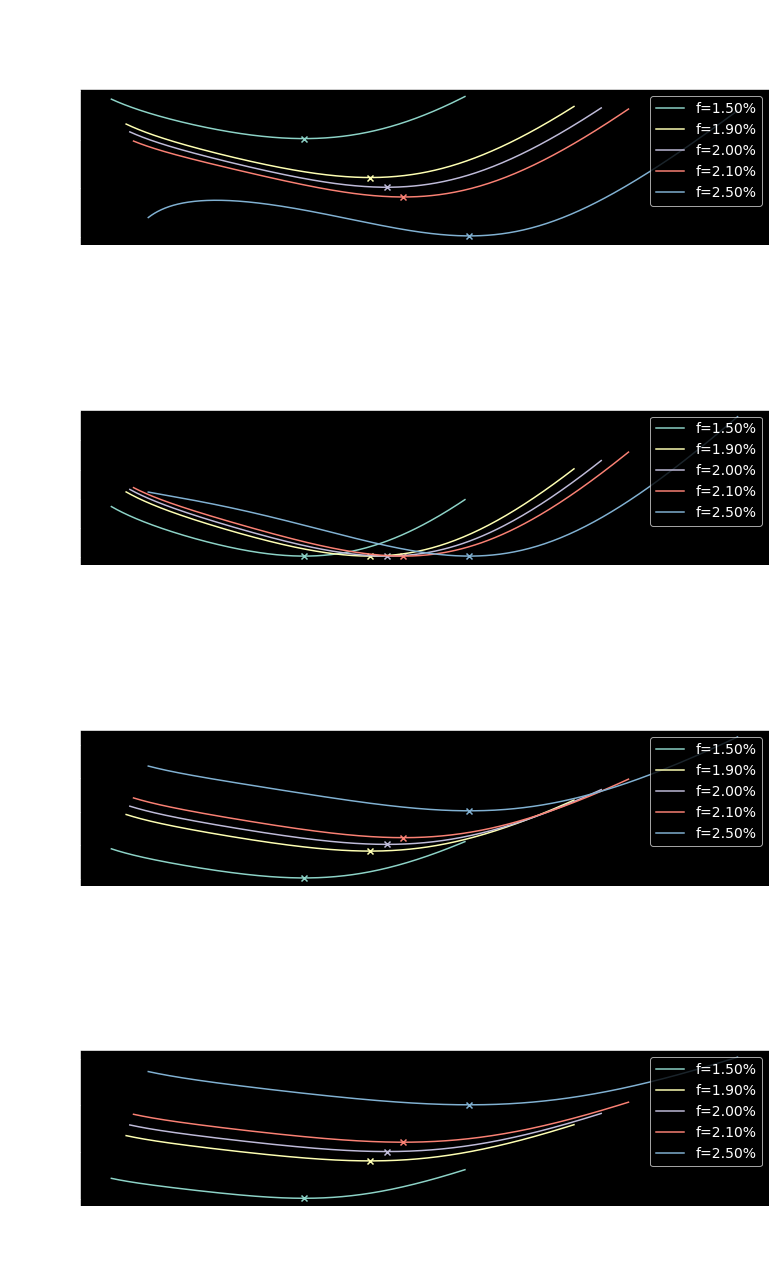

In [9]:
xlabel = 'strike\n\n'
ylabel = 'implied vol'

f = 2*ONE_PCT

shift = 0.8
sigma_0 = 20*ONE_PCT
vov = 40*ONE_PCT
rho = -40*ONE_PCT
L = f

mixings = [
    -0.5,
    0.0,
    0.5,
    1.0
]

f_shocks = [
    -50*ONE_BP, 
    -10*ONE_BP, 
    0, 
    10*ONE_BP, 
    50*ONE_BP
]

Model_N = SLN_adjustable_backbone_N(sigma_0=sigma_0,
                                    rho=rho,
                                    vov=vov,
                                    shift=shift, 
                                    mixing=mixing, 
                                    L=L,
                                    f=f,
                                    n_strikes=N_STRIKES,    
                                    logmoneyness_lo=-1.5,
                                    logmoneyness_hi=0.5,
                                   )

fig, axes = plt.subplots(nrows=4, ncols=1)
    
for i, ax in enumerate(axes):
    mixing = mixings[i]
    Model_N.mixing= mixing
    for f_shock in f_shocks:
        Model_N.f = f+f_shock
        smile = list(Model_N.smile.values())
        label = 'f={:.2%}'.format(f+f_shock)
        ax.plot(Model_N.strike_grid, smile, label=label)
        ax.scatter([Model_N.f], [Model_N.ATM], marker='x')

        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.legend(loc='upper right')
        ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
        ax.set_title('{}\n'.format(Model_N.vol_type)\
                     +r'$shift$={}'.format(Model_N.shift)+'\n'\
                     +r'mixing={}'.format(Model_N.mixing)+'\n',\
                    )

plt.tight_layout()
plt.show()

## Parameter sensitivities

* shift controls the ATM slope of the smile
* mixing is orthogonal to shift (at least for L in the neighborhood of the initial forward) and has no effect on the smile
* $\sigma_0$ controls directly the ATM vol and induces parallel translation of the whole smile
* $\rho$ controls the skew
* vov controls the convexity of the smile
* $L$ has a tiny effect of parallel translation of the smile. It is better to hold it constant to the value of the initial forward to ensure orthogonality of shift and mixing and only update it periodically.

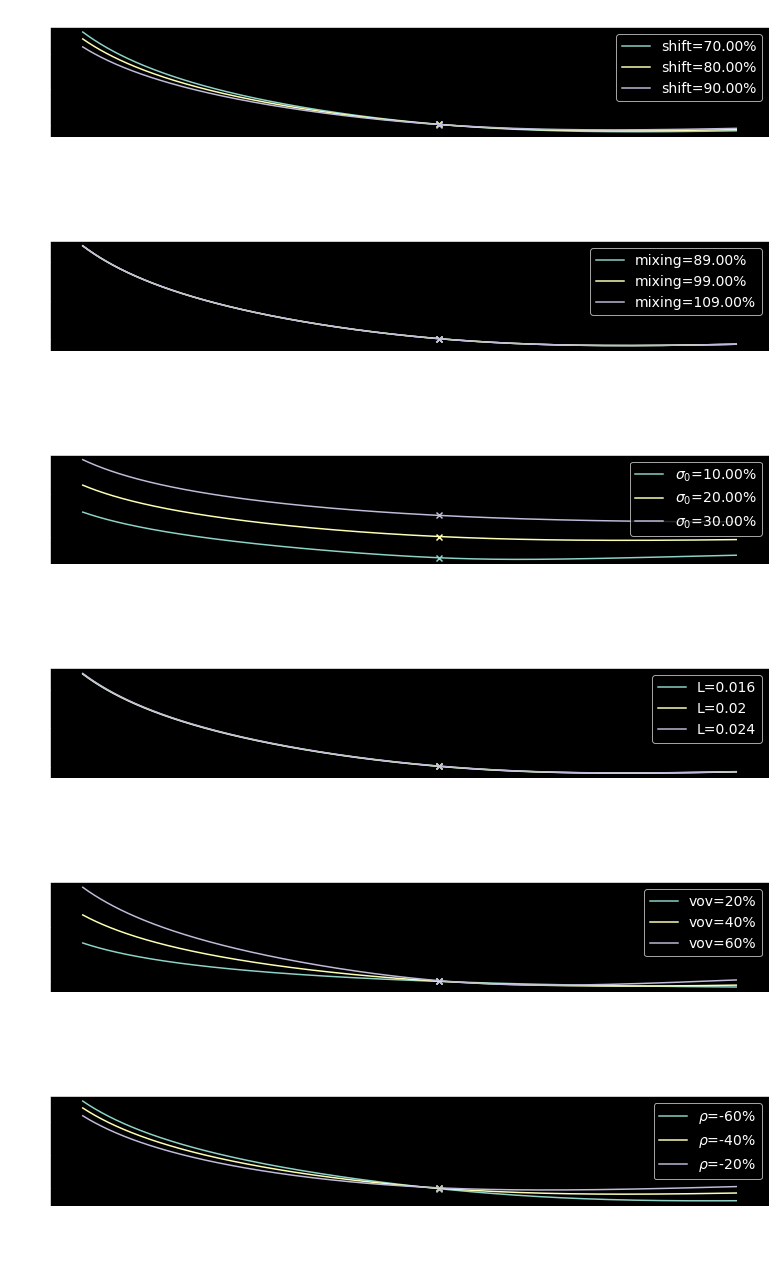

In [10]:
xlabel = 'strike\n\n'
ylabel = 'implied vol'

f = 2*ONE_PCT
shift = 0.8
mixing = 0.99
sigma_0 = 20*ONE_PCT
vov = 40*ONE_PCT
rho = -40*ONE_PCT
L = f

shift_shocks = [-0.1, 0.0, 0.1]
mixing_shocks = [-0.1, 0.0, 0.1]
sigma_0_shocks = [-0.1, 0.0, 0.1]
L_shocks = [-0.2, 0.0, 0.2]
vov_shocks = [-20*ONE_PCT, 0., 20*ONE_PCT]
rho_shocks = [-20*ONE_PCT, 0.0, 20*ONE_PCT]

fig, axes = plt.subplots(nrows=6, ncols=1)

ax = axes[0]  
model = SLN_adjustable_backbone_LN(sigma_0=sigma_0,
                                   rho=rho,
                                   vov=vov,
                                   shift=shift,
                                   mixing=mixing,
                                   L=L,
                                   f=f,
                                   n_strikes=N_STRIKES,
                                   logmoneyness_lo=-1.5,
                                   logmoneyness_hi=0.5,
                                  )

for shift_shock in shift_shocks:
    model.shift = shift+shift_shock
    
    smile = list(model.smile.values())
    label = 'shift={:.2%}'.format(shift+shift_shock)
    ax.plot(model.strike_grid, smile, label=label)
    ax.scatter([model.f], [model.ATM], marker='x')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.set_title('Shift shock')

ax = axes[1]
model = SLN_adjustable_backbone_LN(sigma_0=sigma_0,
                                   rho=rho,
                                   vov=vov,
                                   shift=shift,
                                   mixing=mixing,
                                   L=L,
                                   f=f,
                                   n_strikes=N_STRIKES,
                                   logmoneyness_lo=-1.5,
                                   logmoneyness_hi=0.5,
                                  )

for mixing_shock in mixing_shocks:
    model.mixing = mixing+mixing_shock
    
    smile = list(model.smile.values())
    label = 'mixing={:.2%}'.format(mixing+mixing_shock)
    ax.plot(model.strike_grid, smile, label=label)
    ax.scatter([model.f], [model.ATM], marker='x')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.set_title('Mixing shock')
    
ax = axes[2]
model = SLN_adjustable_backbone_LN(sigma_0=sigma_0,
                                   rho=rho,
                                   vov=vov,
                                   shift=shift,
                                   mixing=mixing,
                                   L=L,
                                   f=f,
                                   n_strikes=N_STRIKES,
                                   logmoneyness_lo=-1.5,
                                   logmoneyness_hi=0.5,
                                  )

for sigma_0_shock in sigma_0_shocks:
    model.sigma_0 = sigma_0+sigma_0_shock

    smile = list(model.smile.values())
    label = r'$\sigma_0$={:.2%}'.format(sigma_0+sigma_0_shock)
    ax.plot(model.strike_grid, smile, label=label)
    ax.scatter([model.f], [model.ATM], marker='x')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.set_title(r'$\sigma_0$ shock')

ax = axes[3]
model = SLN_adjustable_backbone_LN(sigma_0=sigma_0,
                                   rho=rho,
                                   vov=vov,
                                   shift=shift,
                                   mixing=mixing,
                                   L=L,
                                   f=f,
                                   n_strikes=N_STRIKES,
                                   logmoneyness_lo=-1.5,
                                   logmoneyness_hi=0.5,
                                  )

for L_shock in L_shocks:
    model.L = L*(1+L_shock)
    smile = list(model.smile.values())
    label = r'L={:.2}'.format(model.L)
    ax.plot(model.strike_grid, smile, label=label)
    ax.scatter([model.f], [model.ATM], marker='x')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.set_title(r'L shock')

ax = axes[4]
model = SLN_adjustable_backbone_LN(sigma_0=sigma_0,
                                   rho=rho,
                                   vov=vov,
                                   shift=shift,
                                   mixing=mixing,
                                   L=L,
                                   f=f,
                                   n_strikes=N_STRIKES,
                                   logmoneyness_lo=-1.5,
                                   logmoneyness_hi=0.5,
                                  )

for vov_shock in vov_shocks:
    model.vov = vov+vov_shock
    smile = list(model.smile.values())
    label = r'vov={:.0%}'.format(model.vov)
    ax.plot(model.strike_grid, smile, label=label)
    ax.scatter([model.f], [model.ATM], marker='x')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.set_title(r'vov shock')

ax = axes[5]
model = SLN_adjustable_backbone_LN(sigma_0=sigma_0,
                                   rho=rho,
                                   vov=vov,
                                   shift=shift,
                                   mixing=mixing,
                                   L=L,
                                   f=f,
                                   n_strikes=N_STRIKES,
                                   logmoneyness_lo=-1.5,
                                   logmoneyness_hi=0.5,
                                  )

for rho_shock in rho_shocks:
    model.rho = rho+rho_shock
    smile = list(model.smile.values())
    label = r'$\rho$={:.0%}'.format(model.rho)
    ax.plot(model.strike_grid, smile, label=label)
    ax.scatter([model.f], [model.ATM], marker='x')

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(loc='upper right')
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
    ax.set_title(r'$\rho$ shock')
    
plt.tight_layout()
plt.show()